<a href="https://colab.research.google.com/github/grjadhav409/Cheminformatics-/blob/master/Handling_Molecules_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading dataset

https://pandas.pydata.org/docs/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/grjadhav409/Cheminformatics-/master/data/alkanes.csv")

In [3]:
df

,name,charge,species,species1,species2,species3,enthalpy,hfg_0K
0,Decane,0,C10H22,10,22.0,NaN,-249.70,NaN
1,Nonane,0,C9H20,9,20.0,NaN,-228.30,NaN
2,tetramethylbutane,0,(CH3)3CC(CH3)3,3,3.0,3.0,-226.20,NaN
3,Octane,0,C8H18,8,18.0,NaN,-208.40,NaN
4,2-methylhexane,0,C7H16,7,16.0,NaN,-195.00,NaN
5,3-methylhexane,0,C7H16,7,16.0,NaN,-192.30,NaN
6,heptane,0,C7H16,7,16.0,NaN,-187.80,NaN
7,"Butane, 2,2-dimethyl-",0,C6H14,6,14.0,NaN,-184.00,-143.50
8,"Butane, 2,3-dimethyl-",0,C6H14,6,14.0,NaN,-177.80,NaN
9,"Pentane, 2-methyl-",0,C6H14,6,14.0,NaN,-174.60,-135.30


In [4]:
enthalpy_data = df[["name","enthalpy"]].head(5)

In [5]:
enthalpy_data

,name,enthalpy
0,Decane,-249.7
1,Nonane,-228.3
2,tetramethylbutane,-226.2
3,Octane,-208.4
4,2-methylhexane,-195.0


## Common/IUPAC name to SMILES 

https://cactus.nci.nih.gov/

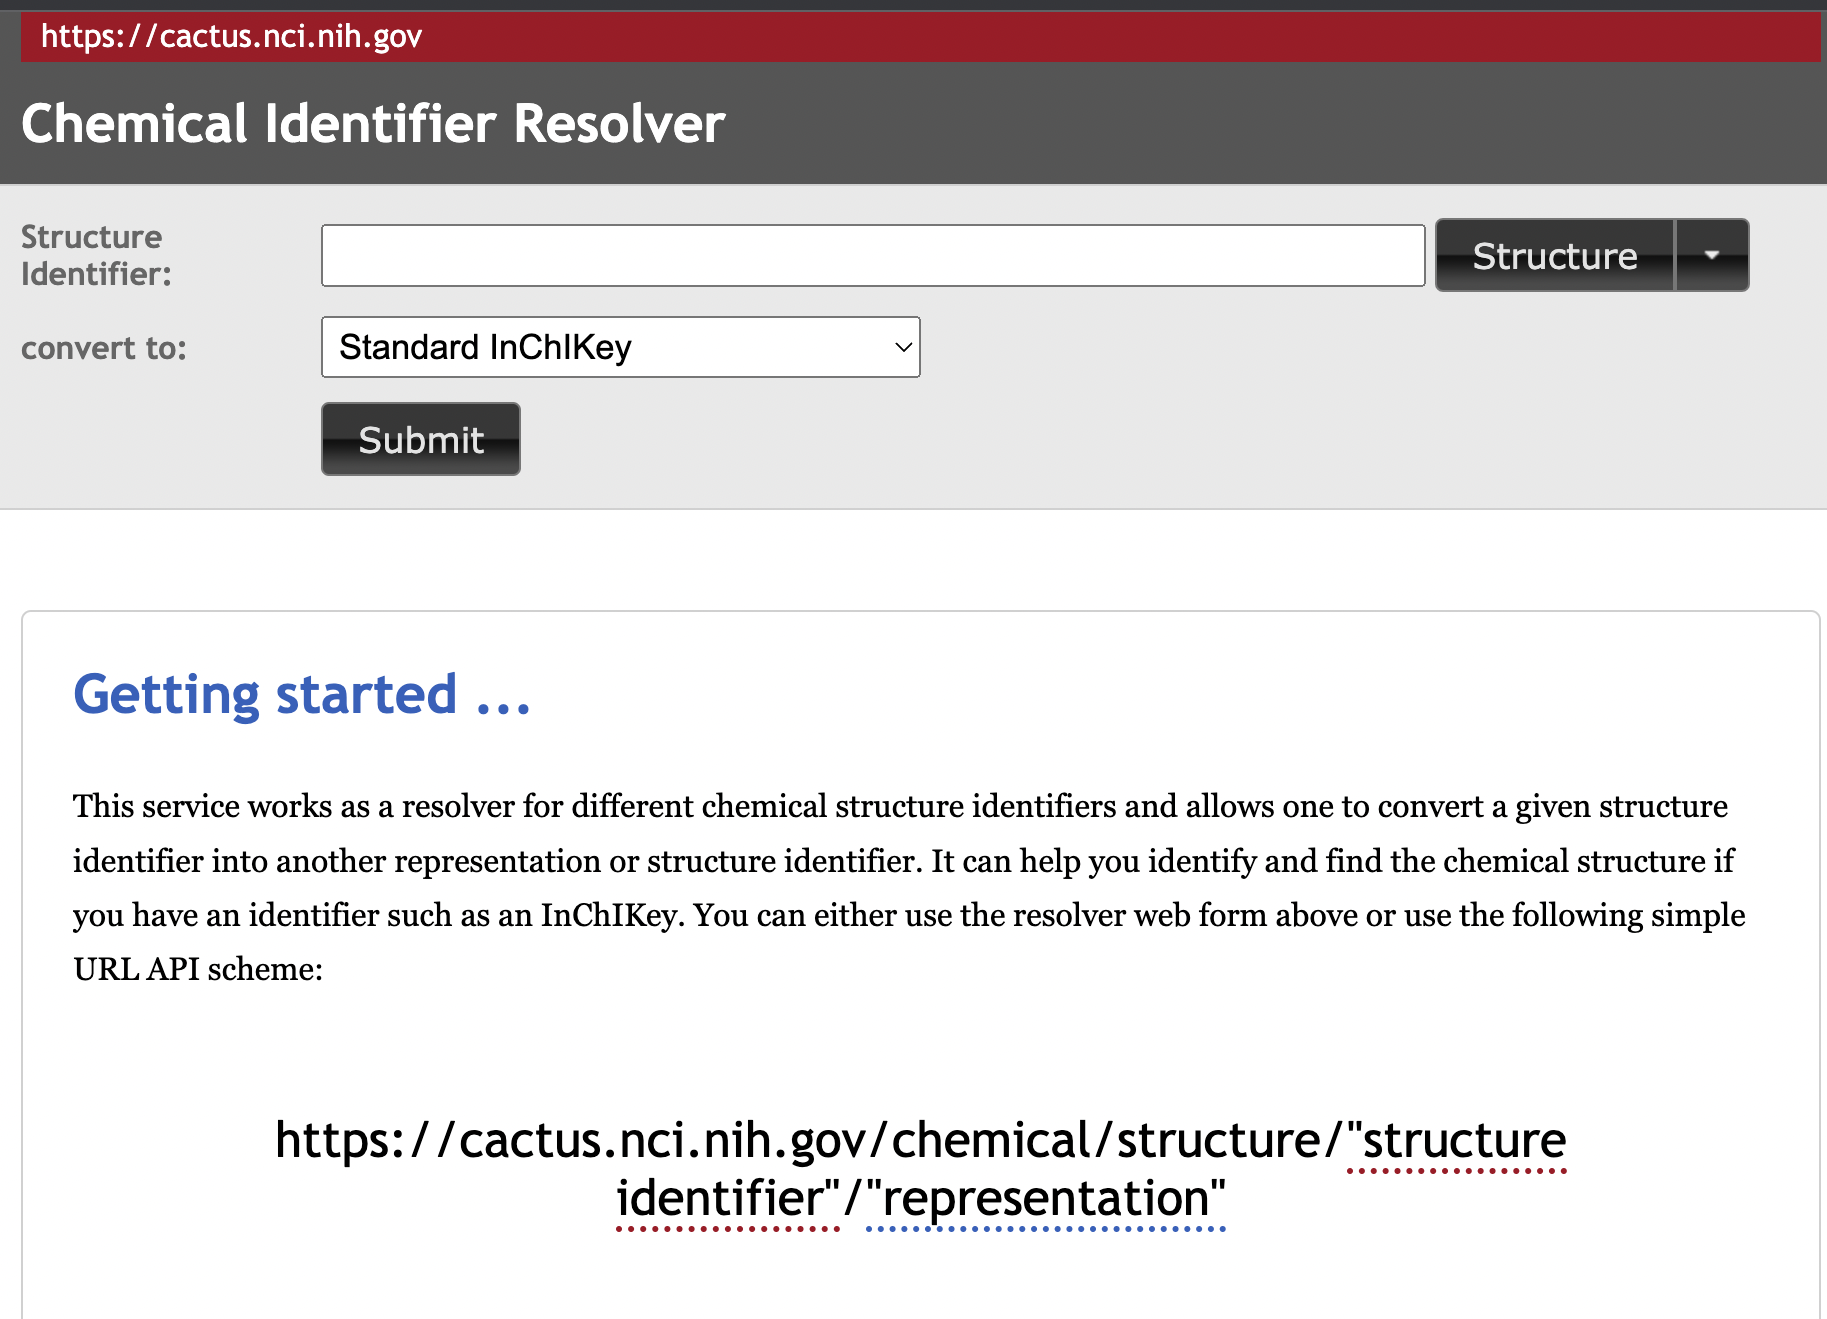



In [6]:
# convert common or IUPAC name into SMILES

from urllib.request import urlopen
from urllib.parse import quote


def CIRconvert(name):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(name) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'


common_names = enthalpy_data['name'].tolist()

d= []
for name in common_names :
    d.append(
        {
            'name': name,
            'SMILES':CIRconvert(name)
        }
    )

smiles = pd.DataFrame(d)
smiles


,name,SMILES
0,Decane,CCCCCCCCCC
1,Nonane,CCCCCCCCC
2,tetramethylbutane,CCC(C)C(C)(C)C
3,Octane,CCCCCCCC
4,2-methylhexane,CCCCC(C)C


In [7]:
 df_with_smiles = pd.merge(enthalpy_data,smiles, on='name')
 df_with_smiles

,name,enthalpy,SMILES
0,Decane,-249.7,CCCCCCCCCC
1,Nonane,-228.3,CCCCCCCCC
2,tetramethylbutane,-226.2,CCC(C)C(C)(C)C
3,Octane,-208.4,CCCCCCCC
4,2-methylhexane,-195.0,CCCCC(C)C


## Handling SMILES using RDKit

https://www.rdkit.org/docs/

In [8]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 8.3 MB/s 


In [9]:
from rdkit import Chem

In [10]:
# All of these functions return a rdkit.Chem.rdchem.Mol object on success

eg_mol = Chem.MolFromSmiles("Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C")


In [11]:
eg_mol

In [12]:
#Chem.MolFromMolFile('benzene.mol')
#Chem.SDMolSupplier('biogenic.sdf')

In [13]:
from rdkit.Chem.Draw import IPythonConsole

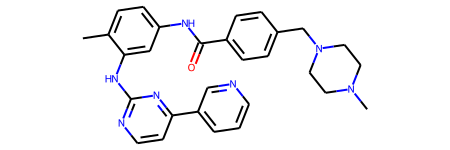

In [14]:
eg_mol

In [15]:
# MolToSmiles gives the canonical SMILES, so  the output would be the same regardless of the input
smiles_1 = Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))
smiles_2 = Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))
smiles_3 = Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1'))
print(smiles_1, smiles_2, smiles_3)


c1ccncc1 c1ccncc1 c1ccncc1


In [16]:
# Removing invalid molecules
# Chem.MolToSmiles(Chem.MolFromSmiles('Zn1ccccc1'))

## Calculating coordinates

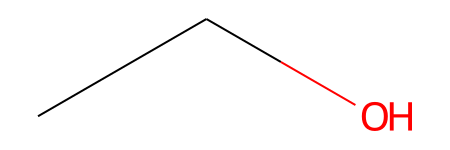

In [17]:
# construct ethanol molecule

ethanol = Chem.MolFromSmiles('CCO')
ethanol

In [18]:
# coordinates 
print(Chem.MolToMolBlock(ethanol))


     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END



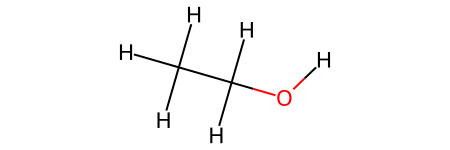

In [19]:
ethanol_h = Chem.AddHs(ethanol) # add Hydrohens
ethanol_h

In [20]:
print(Chem.MolToMolBlock(ethanol_h)) # coordinates including H atom


     RDKit          2D

  9  8  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  1  4  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
  2  8  1  0
  3  9  1  0
M  END



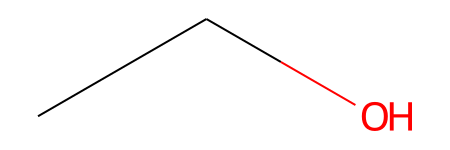

In [21]:
Chem.RemoveHs(ethanol_h) # remove Hydrogens

## getting molecular, atomic properties

In [22]:
# no of atoms in ethane

ethanol.GetNumAtoms()  #H explicited

3

In [23]:
# no of atoms in ethane
 
ethanol_h.GetNumAtoms()  # including H

9

In [24]:
# atomic no of each atom
for atom in ethanol.GetAtoms():
  print(atom.GetAtomicNum())

6
6
8


In [25]:
# bond type
for bond in ethanol.GetBonds():
  print(bond.GetBondType())

SINGLE
SINGLE


In [26]:
# You can also query individual bonds or atoms :

ethanol.GetAtomWithIdx(2).GetAtomicNum()

8

In [27]:
# how many bonds are connected :
ethanol.GetAtomWithIdx(0).GetExplicitValence()

1

In [28]:
ethanol_h.GetAtomWithIdx(0).GetExplicitValence() # including h

4

In [29]:
bond = ethanol.GetBondWithIdx(0) # assign bond
print(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) # between which atoms above bond is connected

0 1


In [30]:
# get the neighbours of a particular atom in a molecule:
atom = ethanol_h.GetAtomWithIdx(1)

for i in atom.GetNeighbors():
  print(i.GetAtomicNum())

6
8
1
1


In [31]:
# perticular atom,bond is in ring or not
print(ethanol.GetAtomWithIdx(0).IsInRing())

False


In [32]:
# perticular bond aromatic or not
print(ethanol.GetBondWithIdx(1).GetIsAromatic())

False


## Drawing molecular structures using SMILES

In [33]:
df_with_smiles

,name,enthalpy,SMILES
0,Decane,-249.7,CCCCCCCCCC
1,Nonane,-228.3,CCCCCCCCC
2,tetramethylbutane,-226.2,CCC(C)C(C)(C)C
3,Octane,-208.4,CCCCCCCC
4,2-methylhexane,-195.0,CCCCC(C)C


In [34]:
smiles_list = df_with_smiles["SMILES"].to_list()

smiles_list

['CCCCCCCCCC', 'CCCCCCCCC', 'CCC(C)C(C)(C)C', 'CCCCCCCC', 'CCCCC(C)C']

In [35]:
mols = []
for i in smiles_list:
  mols.append(Chem.MolFromSmiles(i))

In [36]:
mols

In [37]:
from rdkit.Chem import Draw

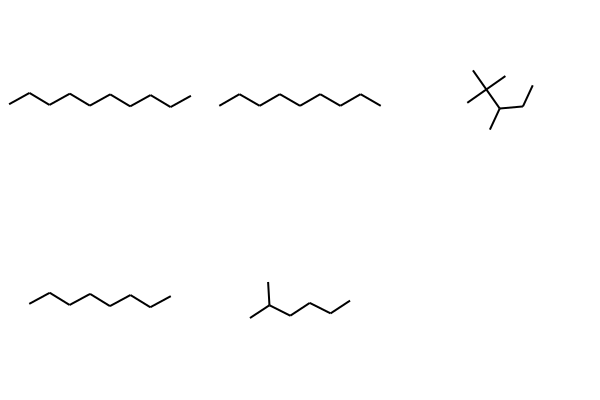

In [38]:
Draw.MolsToGridImage(mols,molsPerRow=3)

## Alternative method to draw molecules:

In [39]:
!pip install mols2grid
import mols2grid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.9 MB/s 
     |████████████████████████████████| 1.6 MB 27.8 MB/s 


In [40]:
mols2grid.display(mols)

MolGridWidget()

### Drawing molecules with labels

In [41]:
df_with_smiles["rdkit_object"]= mols

In [42]:
df_with_smiles

,name,enthalpy,SMILES,rdkit_object
0,Decane,-249.7,CCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fb42a7e4120>
1,Nonane,-228.3,CCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fb40c76ef30>
2,tetramethylbutane,-226.2,CCC(C)C(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7fb4072ce5d0>
3,Octane,-208.4,CCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fb4072ce1c0>
4,2-methylhexane,-195.0,CCCCC(C)C,<rdkit.Chem.rdchem.Mol object at 0x7fb4072ce120>


In [43]:
mols2grid.display(df_with_smiles,mol_col='rdkit_object',subset=["img",'enthalpy',"name"])

MolGridWidget()

## Substructure search:

In [44]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

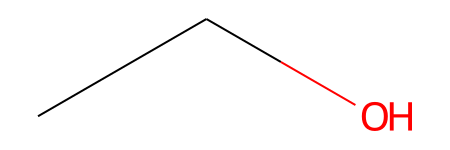

In [45]:
ethanol

In [46]:
# substructure we want to search

substr = Chem.MolFromSmiles("CO")

In [47]:
# list of atoms index of substructure which are present in ethane

hit_ats = list(ethanol.GetSubstructMatch(substr))

In [48]:
hit_ats

[1, 2]

In [49]:
hit_bonds = []

for bond in substr.GetBonds():
    start_atom = hit_ats[bond.GetBeginAtomIdx()]
    end_atom = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(ethanol.GetBondBetweenAtoms(start_atom,end_atom).GetIdx())


In [50]:
hit_bonds # index of the bond between hit_ats

[1]

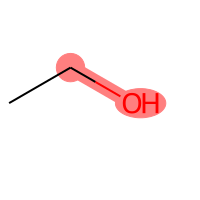

In [51]:
# highlighting substructure

d = rdMolDraw2D.MolDraw2DSVG(200, 200)

rdMolDraw2D.PrepareAndDrawMolecule(d, 
                                   ethanol, 
                                   highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)

d.FinishDrawing()

SVG(d.GetDrawingText())

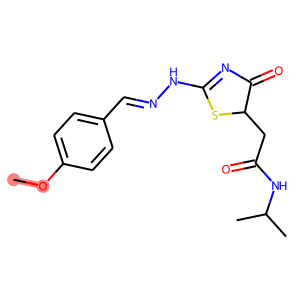

In [52]:
smi = 'COc1ccc(C=NNC2=NC(=O)C(CC(=O)NC(C)C)S2)cc1'
mol = Chem.MolFromSmiles(smi)

patt = Chem.MolFromSmiles("CO")
hit_ats = list(mol.GetSubstructMatch(patt))

hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())


d = rdMolDraw2D.MolDraw2DSVG(300, 300)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)
d.FinishDrawing()
SVG(d.GetDrawingText())

## Calculating Descriptors

https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html

In [53]:
from rdkit.Chem.Descriptors import MolWt

df_with_smiles['MW'] = [MolWt(x) for x in df_with_smiles.rdkit_object]

In [54]:
df_with_smiles

,name,enthalpy,SMILES,rdkit_object,MW
0,Decane,-249.7,CCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fb42a7e4120>,142.286
1,Nonane,-228.3,CCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fb40c76ef30>,128.259
2,tetramethylbutane,-226.2,CCC(C)C(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7fb4072ce5d0>,114.232
3,Octane,-208.4,CCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fb4072ce1c0>,114.232
4,2-methylhexane,-195.0,CCCCC(C)C,<rdkit.Chem.rdchem.Mol object at 0x7fb4072ce120>,100.205


In [55]:
mols2grid.display(df_with_smiles,mol_col='rdkit_object',subset=["img",'enthalpy',"MW"])

MolGridWidget()

In [56]:
# restricting decimals until two
mols2grid.display(df_with_smiles,mol_col='rdkit_object',subset=["img",'enthalpy',"MW"],transform={"MW" : lambda x: f"{x:.2f}"})

MolGridWidget()

## data visualisation

https://seaborn.pydata.org/

In [57]:
import seaborn as sns

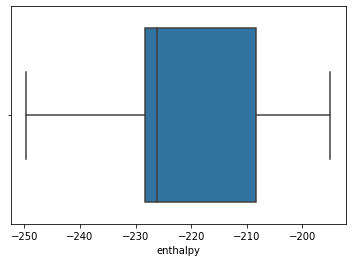

In [58]:
sns.boxplot(x=df_with_smiles.enthalpy)

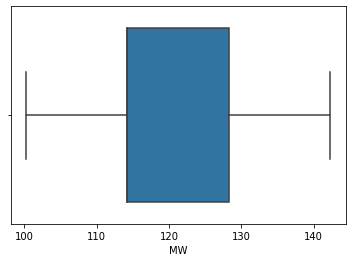

In [59]:
sns.boxplot(x=df_with_smiles.MW)

In [60]:
"""df2 = pd.read_csv("https://raw.githubusercontent.com/grjadhav409/Cheminformatics-/master/data/ChEMBL_hERG.csv")
df2.head()"""

'df2 = pd.read_csv("https://raw.githubusercontent.com/grjadhav409/Cheminformatics-/master/data/ChEMBL_hERG.csv")\ndf2.head()'